# Lab 10

by Vsevolod Klyushev

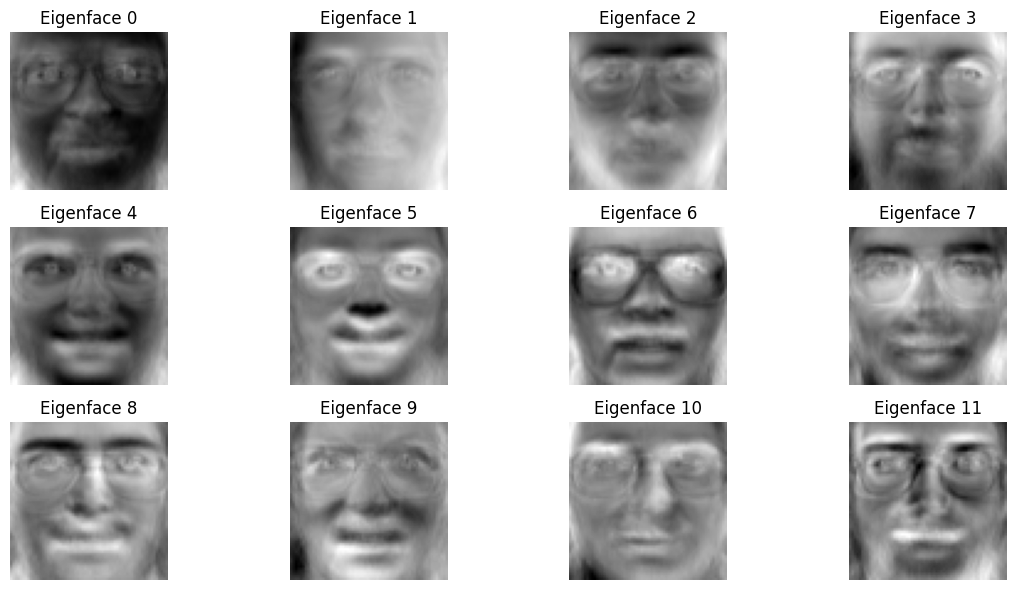

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tqdm import tqdm

dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mean_face = np.mean(X_train, axis=0) 
X_train_centered = X_train - mean_face  
X_test_centered = X_test - mean_face

cov_matrix = np.cov(X_train_centered.T)

r = 12 
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

idxs = np.argsort(eigenvalues)[::-1]
r_eigenvectors = eigenvectors[:, idxs[:r]]
eigenfaces = r_eigenvectors.T.reshape(r, 64, 64)

plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"Eigenface {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

100%|██████████| 99/99 [00:00<00:00, 127.28it/s]
C:\Users\Kiaver\AppData\Local\Temp\ipykernel_3428\2149335041.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


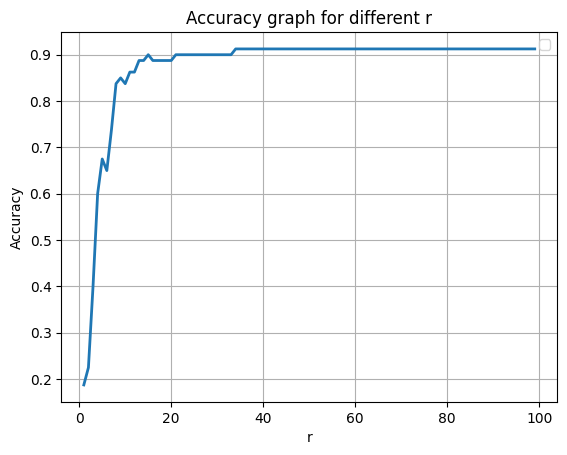

In [4]:
def predict(test_weight, train_weights, y_train, k=1):
    distances = np.linalg.norm(train_weights - test_weight, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    return np.bincount(nearest_labels).argmax()

def estimate_algorithm(rs):
    accuracy = []
    for r in tqdm(rs):
        idxs = np.argsort(eigenvalues)[::-1]
        r_eigenvectors = eigenvectors[:, idxs[:r]]
        train_projection = np.dot(X_train_centered, r_eigenvectors)
        test_projection = np.dot(X_test_centered, r_eigenvectors)
        y_pred = np.array([predict(test_projection[i], train_projection, y_train) for i in range(len(X_test))])   
        accuracy.append(np.mean(y_pred == y_test))
    
    plt.plot(rs, accuracy, lw=2)
    plt.title(f"Accuracy graph for different r")
    plt.xlabel("r")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

estimate_algorithm(np.arange(1, 100))

Results: As we can see, with increase of r the accuracy also increases. However, after r=40 it seems not to be usefull, since accuracy stops growing noticably. We can clearly see, that at the begining, accuracy growth is very rapid. Most significant information lies in first eigenvectora, which corresponds to largest eigenvalues. To find optimal r value we can use, for example, elbow method